In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
pip install xlrd

In [ ]:
fin =  pd.read_excel("../input/finance/finaccess.xls")
fin.head()

In [ ]:
#check for dtypes
fin.dtypes

In [ ]:
#check for missing NAN
fin.isnull().sum()

In [ ]:
#return column labels
fin.columns

In [ ]:
#comparing income and education
plt.scatter(fin['Income'],fin['Education'])

K-means method involves selecting a number of classes and initializing their respective center points

In [ ]:
from sklearn.cluster import KMeans

#5 clusters will be generated
km = KMeans(n_clusters=5)

In [ ]:
#preparing 
x_features = fin[['Income','Education']]


In [ ]:
#fit and predict
clusters = km.fit_predict(x_features)
#and then get all the labels(clusters)
km.labels_

In [ ]:
clusters

In [ ]:
#check if predicted clusters is the same as our labels
clusters is km.labels_

In [ ]:
km.cluster_centers_

In [ ]:
#store clusters and map in df
fin['cluster_no'] = clusters
fin.head()

In [ ]:
#now plot said clusters
plt.scatter(fin['Income'],fin['Education'],c=fin['cluster_no'],cmap='gist_rainbow')

The elbow method is used to select optimal number of clusters for K-means clustering. The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center. Other metrics can also be used such as the silhouette score, the mean silhouette coefficient for all samples or the calinski_harabasz score, which computes the ratio of dispersion between and within clusters.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

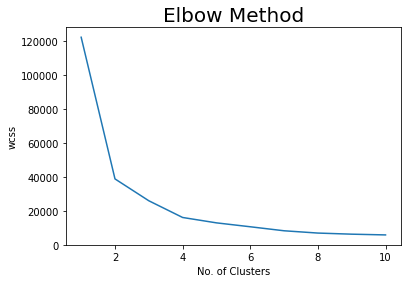

In [37]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                max_iter = 300, n_init = 10, random_state = 42)
    km.fit(x_features)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

The elbow method is used to determine the optimal value of k. This is the value at the "elbow" ie the point after which the distortion/inertia start decreasing in a linear fashion. In our case, the k value is 4.

**Hierarchical Clustering**

Using Iris Dataset

In [44]:
from sklearn import datasets
iris = datasets.load_iris()
 
 
df=pd.DataFrame(iris['data'])
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [48]:
np.unique(iris.target,return_counts=True)
# 3 targets of 50 observations each

(array([0, 1, 2]), array([50, 50, 50]))

In [49]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [51]:
#scaling the dataset using whiten to a standard deviation of 1
from scipy.cluster.vq import whiten
scaled_data = whiten(df.to_numpy())
#varaince of every feature is close to 1
pd.DataFrame(scaled_data).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,7.080243,7.037882,2.135951,1.578709
std,1.003350,1.003350,1.003350,1.003350
min,5.210218,4.603935,0.568374,0.131632
25%,6.179561,6.445509,0.909399,0.394897
50%,7.027736,6.905903,2.472428,1.711218
75%,7.754744,7.596493,2.898709,2.369379
max,9.572262,10.128658,3.921782,3.290805


In [52]:
#create distance matrix based on linkage

# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage
 
# Use the linkage() function
distance_matrix = linkage(scaled_data, method = 'ward', metric = 'euclidean')


**Introduction to dendrograms**

Dendrograms help in showing progressions as clusters are merged. It is a branching diagram that demonstrates how each cluster is composed by branching out into its child nodes.

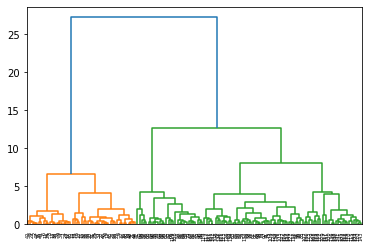

In [53]:
from scipy.cluster.hierarchy import dendrogram
dn = dendrogram(distance_matrix)
plt.show()
# we see that a good candidate for the clusters is no 3

In [54]:
#run the clustering
# Assign cluster labels
df['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')


Text(0.5, 1.0, 'Hierarchical')

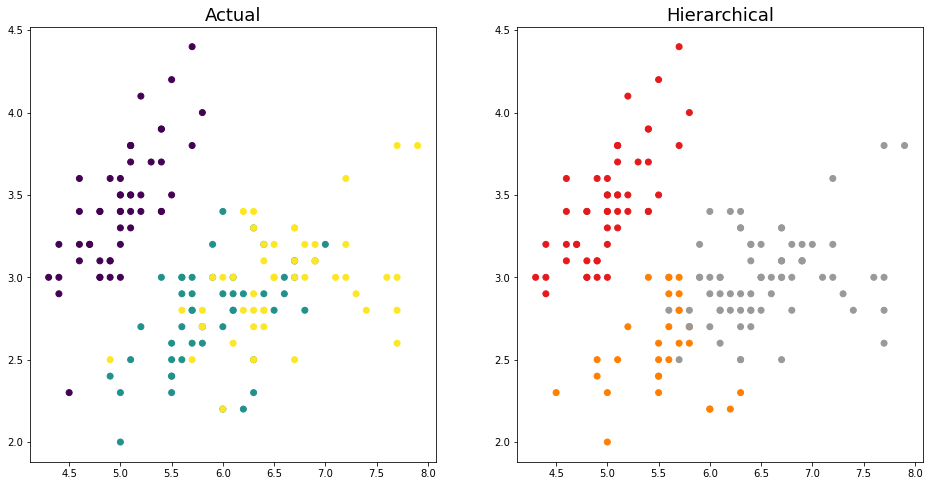

In [58]:
df['target'] = iris.target
 
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['cluster_labels'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Hierarchical', fontsize=18)
